In [1]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset 
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [3]:
#Let's check if there are any null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Describe the dataset to get rough idea about the data 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Well let's see all the columns in the dataset 
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#A brief look at the initial rows of the dataset 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#It's good to shuffle the datset 
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
#Let's take a look again 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [9]:
#Non fradulant cases
df.Class.value_counts()[0]

284315

In [10]:
#Fradulant cases 
df.Class.value_counts()[1]

492

In [11]:
print('Percentage of correct transactions: {}'.format((df.Class.value_counts()[0]/df.shape[0])*100))

Percentage of correct transactions: 99.82725143693798


In [12]:
print('Percentage of fradulent transactions: {}'.format((df.Class.value_counts()[1]/df.shape[0])*100))

Percentage of fradulent transactions: 0.1727485630620034


Text(0.5, 1.0, 'Normal v/s Fraudulent')

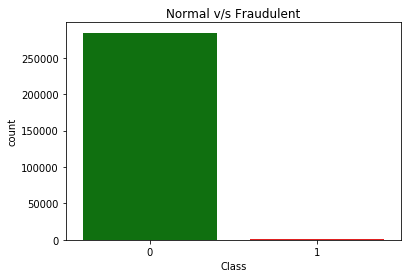

In [13]:
#Let's visualize the distribution of the classes (0 means safe and 1 means fraudulent)
import seaborn as sns
colors = ['green', 'red']

sns.countplot('Class', data=df, palette=colors)
plt.title('Normal v/s Fraudulent')

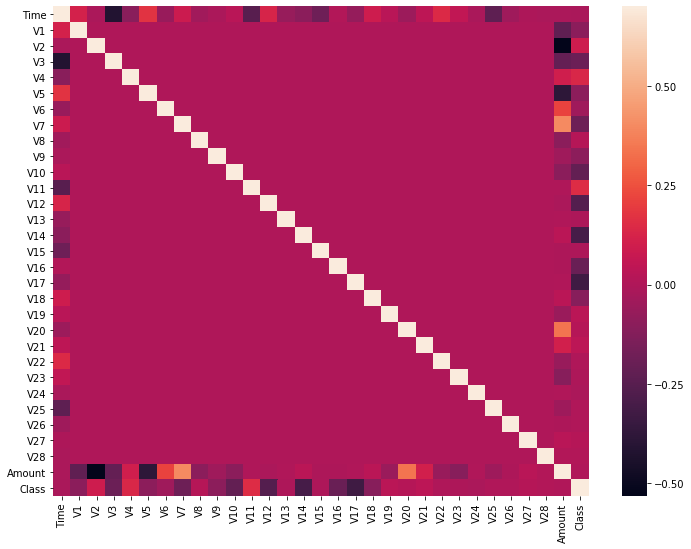

In [14]:
#Now let's map how much a feature affects our class 
cor = df.corr()
fig = plt.figure(figsize = (12, 9))

#Plotting the heatmap
sns.heatmap(cor, vmax = 0.7)
plt.show()

In [15]:
cor.shape

(31, 31)

In [16]:
#This is how much a each feature affects the our class 
cor.iloc[-1,:]

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [17]:
#We need to delet the least and greatest values 
#From above analysis I've selected the following features 
#Note that I've included the class variable also because I intend to create a new dataframe using the new features
new_features=['V1','V3','V4','V7','V10','V11','V12','V14','V16','V17','V18','Class']

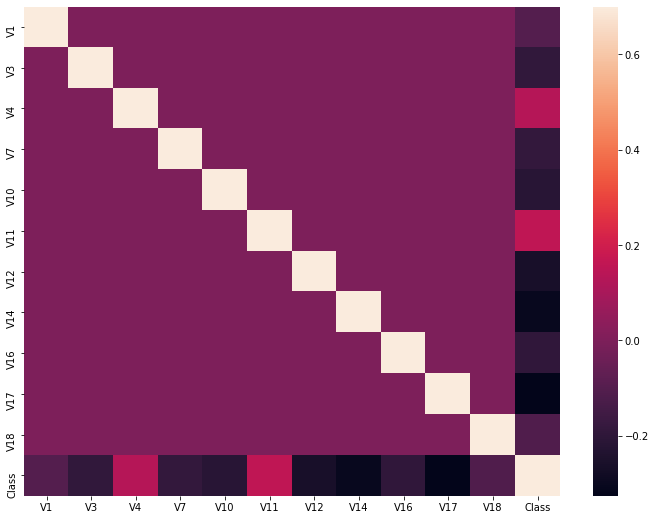

In [18]:
#Let's plot a heatmap again and see the relationship
cor = df[new_features].corr()
fig = plt.figure(figsize = (12, 9))

#Plotting the heatmap
sns.heatmap(cor, vmax = 0.7)
plt.show()

In [19]:
#We see that the class rows and columns are darker and brighter 
#This means that all the variables in our new dataset have a significant affect 

In [20]:
#Now splitting the dataset into the dependent variable(y) and independent variales(x)
x=df[new_features].iloc[:,:-1].values
y=df[new_features].iloc[:,-1].values

In [21]:
#Withoud reducing the features 
#x=df.iloc[:,:-1].values
#y=df.iloc[:,-1].values
#Feel free to try using all the features :)

In [22]:
x.shape

(284807, 11)

In [23]:
y.shape

(284807,)

In [24]:
x[:5]

array([[-16.52650657, -18.64985319,   9.50559352, -16.7016943 ,
        -14.11018444,   5.29923635, -10.83400648,  -9.37385858,
         -9.89924654, -19.23629237,  -8.39855199],
       [  0.33981206,  -0.13406951,  -1.38572931,  -0.52437906,
         -0.56501168,  -0.08767026,   0.97942699,  -0.21788381,
         -2.14289209,   0.12695606,   1.75266151],
       [  1.39959027,   0.16861894,  -1.02995033,  -0.71256669,
          0.75680054,   0.54382736,   0.11245297,  -0.24577198,
          1.76986004,  -0.53317225,  -0.53330034],
       [ -0.43207114,  -1.66936063,  -0.34950427,   0.2769901 ,
         -1.37664827,  -1.32833549,   0.22362068,  -0.55087541,
          0.49797416,   0.50219547,   0.98134276],
       [  2.01416028,  -1.015839  ,   0.32726896,   0.04324084,
          0.2594519 ,   0.942162  ,   0.85003765,   0.59263386,
          0.09107725,  -0.47186666,  -0.33381639]])

In [25]:
y[:5]

array([1, 0, 0, 0, 0])

In [26]:
#Spliting the data into train and test sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [27]:
#Let's see how many safe and fraudulent cases are there in training set 
safe_train=(y_train==0).sum()
fraud_train=(y_train==1).sum()
print("Safe: {} \nFraud: {}".format(safe_train,fraud_train))

Safe: 213242 
Fraud: 363


In [28]:
#Let's see how many safe and fraudulent cases are there in test set 
safe_test=(y_test==0).sum()
fraud_test=(y_test==1).sum()
print("Safe: {} \nFraud: {}".format(safe_test,fraud_test))

Safe: 71073 
Fraud: 129


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [30]:
#Using Logistic Regression 
clf = LogisticRegression(random_state = 0)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#Let's evaluate our model 
y_pred = clf.predict(x_test)
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.9991432784813089
Testing Accuracy:  0.9991432824920649
[[71069     4]
 [   57    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71073
           1       0.95      0.56      0.70       129

    accuracy                           1.00     71202
   macro avg       0.97      0.78      0.85     71202
weighted avg       1.00      1.00      1.00     71202



# Looking at the Accuracy fallacy 

## What it is ? 
If we look at the accuracy on test set, it's nearly 0.99914 i.e. over 99.9% accuracy.
Does that mean our model is phenomenal? No!
Before that let me tell you what a confusion matrix for binary classification represents 
We made the matrix between the actual values and predicted values, so the rows represent the actual values and columns respresent the predicted values. Now that you know what rows and colmns are let's understand what each cell represnt hence:
1. [0][0] -> True positives i.e. how many safe cases are there that our model predicted correctly. Here 71069 are the number of CORRECTLY PREDICTED safe cases. 
2. [0][1] -> False Negatives i.e. how many safe cases are there that our model predicted incorrectly. Here 4 are the number of the MISCLASSIFIED safe cases. Hence 4 safe cases were misclassified as fraud. This is potentially less dangerous as it's better to stop some safe transactions with slightest chance of fraud.
3. [1][0] -> False Positives i.e. how many fraud cases are there that our model predicted incorrectly. Here 57 are the number of the MISCLASSIFIED fraud cases. Here 57 fraud cases were misclassified as safe. This is very dangerous because we are letting the fraud cases pass through. This can cause huge loss to the organization. 
4. [1][1] -> True negatives i.e. how many fraud cases are there that our model predicted correctly. Here 72 are the number of CORRECTLY PREDICTED fraud cases.

### We can see that despite having an accuracy over 99.9% our model predicted 57 fraud cases incorrectly. This is what I call accuracy fallacy.
This usually happens when data is UNEVENLY DISTRIBUTED. From above code we realize that the number of fraud cases in training set is just 363 whereas the number of safe ones is 213242. This is very unevenly distributed and will give great accuracy but misclassify the dangerous classes.

To give you a perspective, let me misclassify all the fraudulent cases.
Let's predict every case as safe, so our confusion matrix for the test set is as follows:

[[71073         0]

 [129           0]]
 
So new accuracy = 71073/(71073 +  129) = 0.9981
which is nearly 99.8% accuracy.
Again great accuracy, terrible performance.

## So how we measure model performance?

### The answer is precision, recall, f1 score and AUC-ROC curve.
Lets look at each one of them one by one
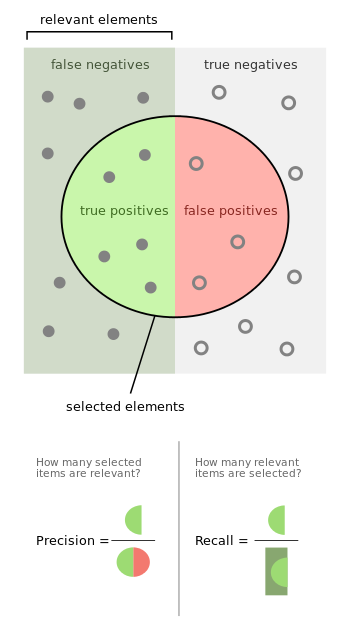

Image source : Wikipedia 
### Precision:
Precision refers to the percentage of your results which are relevant and is calculated as follows : 
True Positives/(True Positives + Flase Positives)

### Recall:
Recall refers to the percentage of total relevant results correctly classified by your algorithm and is calculated as follows : True Positives/(True Positives + False Negatives)

### F1 Score:
It is the harmonic mean of precision and recall and is calculated as follows: 
(2 x Precision x Recall)/(Precision + Recall)

## Hence the greater the F1 score the better it is
In the above example we see that f1 score of safe class is 1 but that of fraud is 0.70 and hence the macro average is 0.85 

### AUC-ROC curve (Area Under Curve - Receiver Operating Characteristic Curve):
The True Positive Rate (TPR) is plot against False Positive Rate (FPR) for the probabilities of the classifier predictions. Then, the area under the plot is calculated. The greater the area under the curve the better our model is.

TPR is also knowns as recall and hence = True Positives/(True Positives + False Negatives)

FPR is negation of specificity = 1 - Specificity = 1- True Negatives/(True Negatives + False Positives) 

Hence FPR = False Positives/(True Negatives + False Positives)



In [32]:
from sklearn.metrics import roc_curve, auc

In [33]:
#Calculating the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

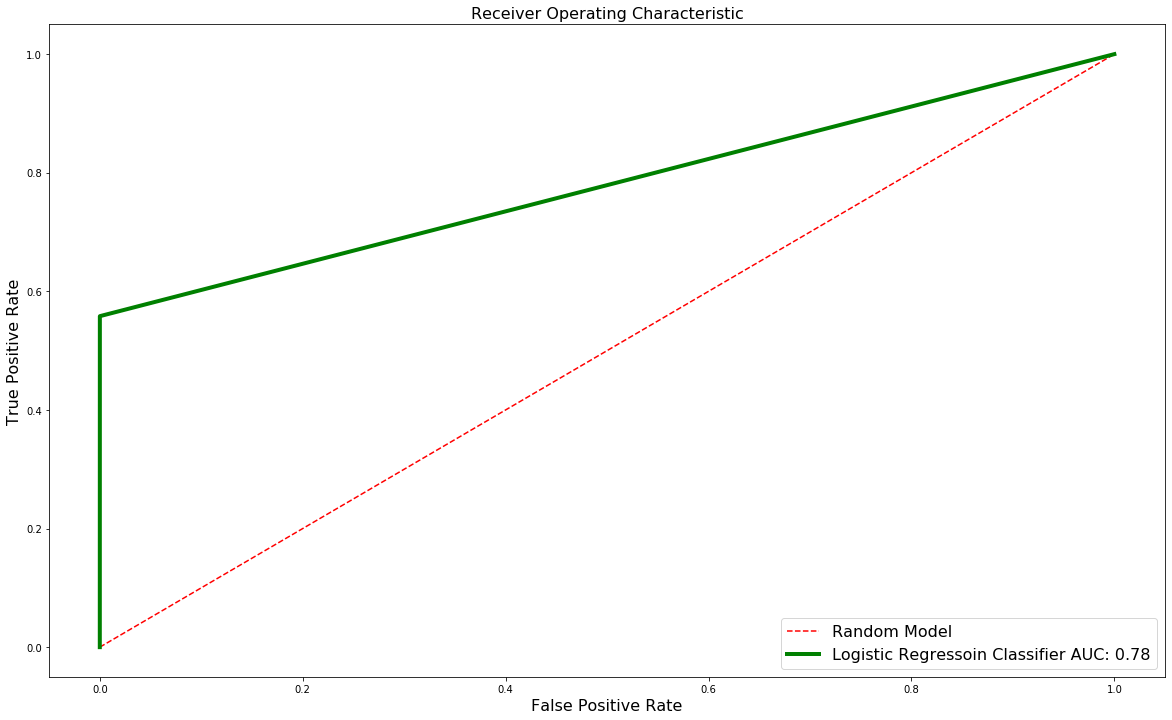

In [34]:
#Plotting the curves 
label = 'Logistic Regressoin Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
label2 = 'Random Model' 
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--', label=label2)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [35]:
#We see that AUC is 0.78 which is not bad, not great but fair enough

## Let's try a supervised anomaly detection algorithm KNN

We use anomaly detection algorithm to find unusual patterns in the data. Since the data is unbalanced greatly and there must be some unusual patterns in data, let's try K Nearest Neighbours Algorithm 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
y_pred = clf.predict(x_test)
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.9996161138550128
Testing Accuracy:  0.9995084407741356
[[71065     8]
 [   27   102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71073
           1       0.93      0.79      0.85       129

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

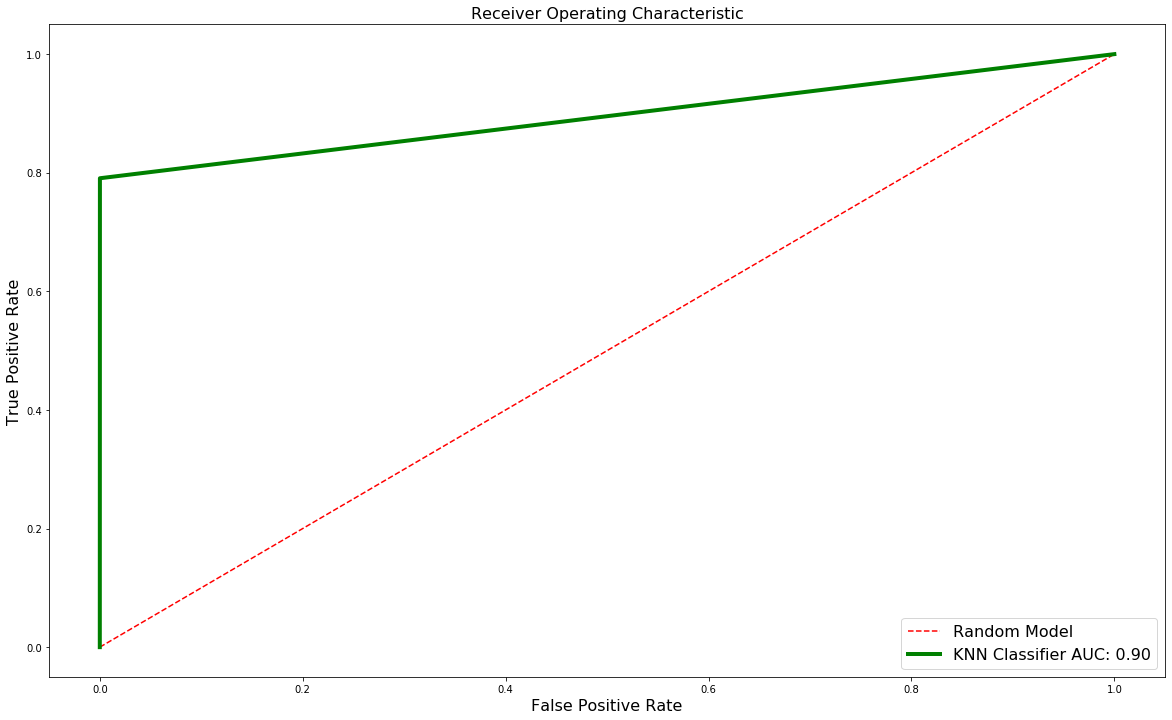

In [39]:
label = 'KNN Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
label2 = 'Random Model' 
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--', label=label2)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [ ]:
#We see that AUC is 0.90 which is good, with different random state of data you may get different AUC.
#I once achieved 0.94
#Though I've kept a constant seed for random state wile shuffling the dataset, feel free to mess with that :D

## Now let's try an unsupervised algorithm namely Isolation forest 

Since it is unsupervised, we don't need the target feature that is our class variable. Also we can use entire dataset instead of training on one and hence testing on the other

Isolation forest tries to separate each point in the data. Here an anomalous point could be separated in a few steps while normal points which are closer could take significantly more steps to be segregated.

In [40]:
(df.Class.value_counts()[1]/df.Class.value_counts()[0])

0.0017304750013189597

In [41]:
#Importing and fitting the Isolation Forest Algorithm 
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=(df.Class.value_counts()[1]/df.shape[0]), random_state=123,max_features=x.shape[1])
clf.fit(x)

IsolationForest(behaviour='old', bootstrap=False,
                contamination=0.001727485630620034, max_features=11,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=123, verbose=0, warm_start=False)

In [42]:
#Predicting the class
y_pred = clf.predict(x)

In [43]:
#Since the algorithm classifies one class as 1 and other as -1
#Let's see how many classes it predicted as fraudulent 
(y_pred==-1).sum()

492

In [44]:
#Since our class variables are either 0 or 1, so we need to replace the predicted classes as 0 and 1
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [45]:
#Let's see how good our model performed 
print("Training Accuracy: ",accuracy_score(y, y_pred))
cm = confusion_matrix(y, y_pred)
print(cm)
print(classification_report(y,y_pred))

Training Accuracy:  0.9982795366686914
[[284070    245]
 [   245    247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.50      0.50      0.50       492

    accuracy                           1.00    284807
   macro avg       0.75      0.75      0.75    284807
weighted avg       1.00      1.00      1.00    284807



In [46]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

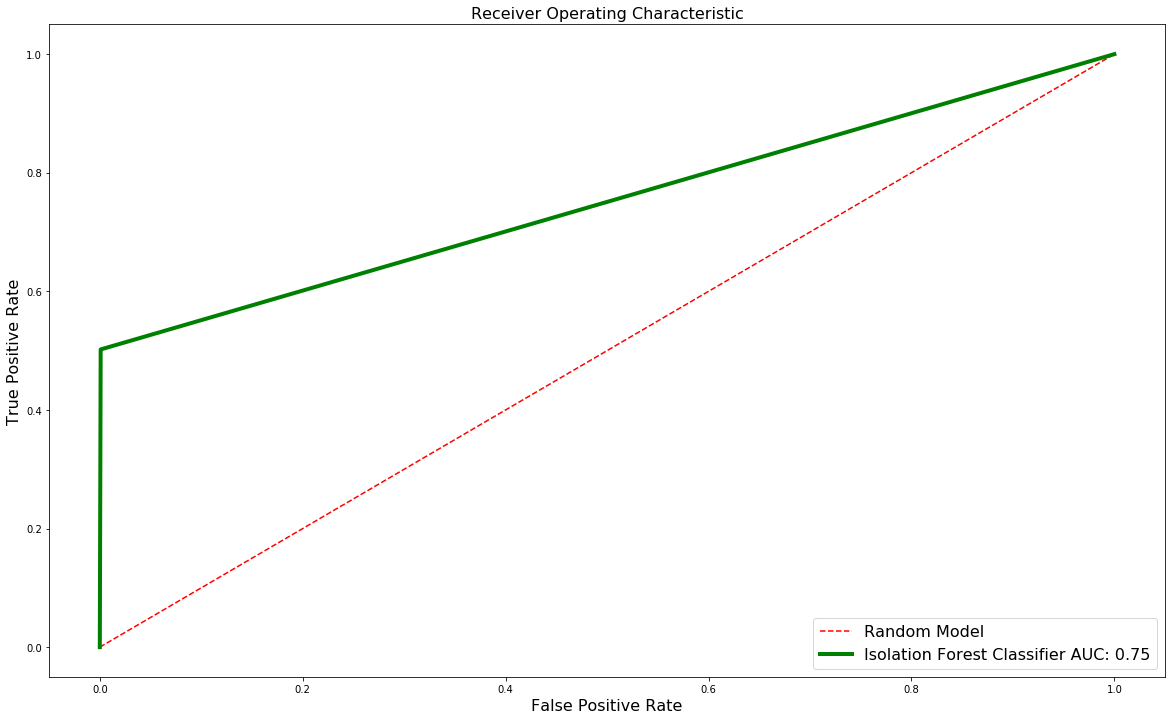

In [47]:
label = 'Isolation Forest Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
label2 = 'Random Model' 
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--', label=label2)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [ ]:
#We get AUC score of 0.75, that's bad. Seems like this algorithm is not working very well on our dataset 

In [48]:
#Let's try another unsupervised algorithm 
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=5,contamination=(df.Class.value_counts()[1]/df.shape[0]))

In [49]:
y_pred = clf.fit_predict(x)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [50]:
print("Training Accuracy: ",accuracy_score(y, y_pred))
cm = confusion_matrix(y, y_pred)
print(cm)
print(classification_report(y,y_pred))

Training Accuracy:  0.9965450287387599
[[283823    492]
 [   492      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



In [51]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

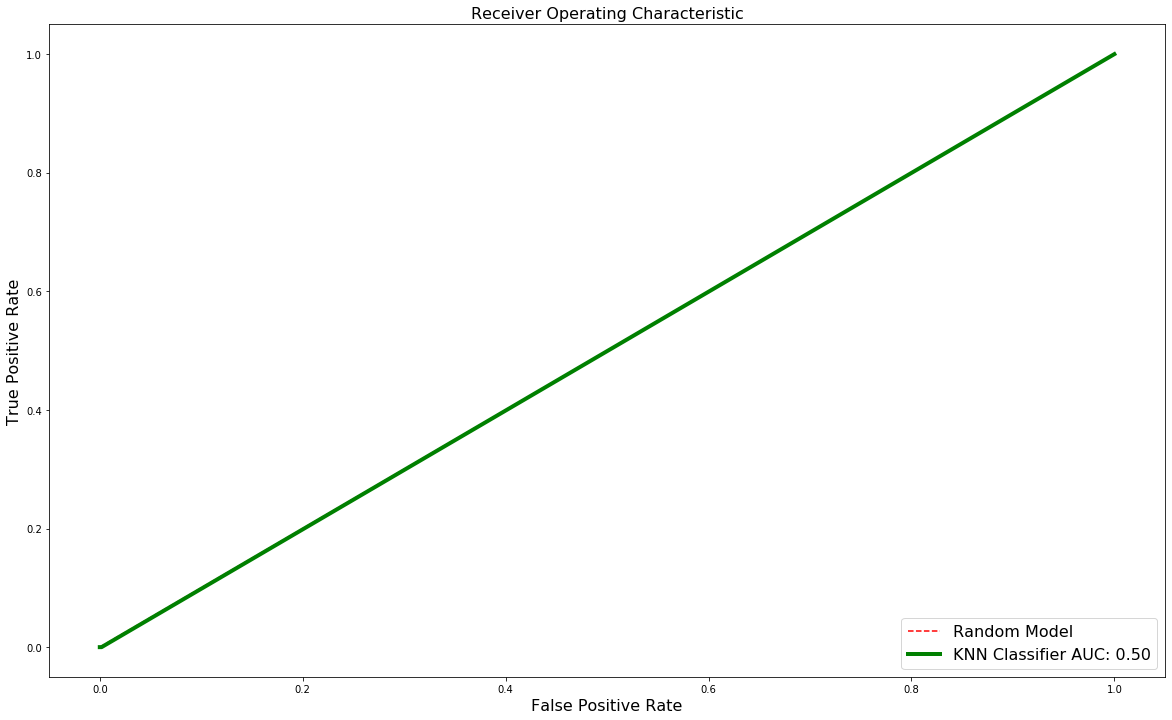

In [52]:
label = 'KNN Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
label2 = 'Random Model' 
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--', label=label2)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [53]:
#WHAT!!!!? That's a garbage model with an AUC of 0.5.
#Moreover it made 0 true negatives and that's a teriible, terrible model

For now it seems that *KNN* is performing quite well for the given data